In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# 读取数据
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.2, random_state=0)

# 将训练数据和测试数据分开
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

KeyboardInterrupt: 

In [4]:
# 数据归一化

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

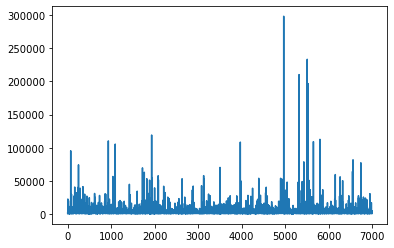

In [5]:
y = data.iloc[:, -1]
plt.plot(range(len(y)),y)

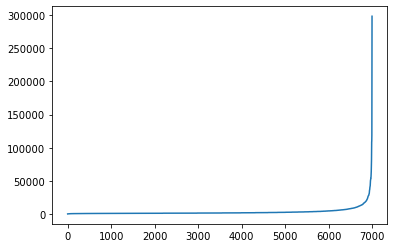

In [6]:
plt.plot(range(len(y)),y)
y_a= y.sort_values()
plt.plot(range(len(y)),y_a)

In [19]:
sum(data[" n_non_stop_words"])
print(sum(data[" n_non_stop_words"]>1))

1


In [24]:
df = data.drop([" n_non_stop_words"," weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"
                ," weekday_is_saturday"," weekday_is_sunday"], axis=1)


In [26]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
32940,8,1094,0.378072,0.503682,10,2,15,2,4.662706,6,...,0.100000,0.50,-0.227855,-0.4,-0.050000,0.333333,0.250000,0.166667,0.250000,924
9739,8,911,0.442714,0.665331,10,0,1,0,4.356751,6,...,0.050000,0.80,-0.192040,-0.5,-0.025000,0.900000,0.800000,0.400000,0.800000,2900
23365,10,434,0.486047,0.684211,8,1,2,0,4.831797,8,...,0.050000,1.00,-0.175000,-0.3,-0.100000,0.900000,0.300000,0.400000,0.300000,814
31332,9,246,0.604255,0.788732,10,7,1,0,4.800813,4,...,0.100000,0.50,-0.219841,-0.5,-0.100000,0.000000,0.000000,0.500000,0.000000,532
34227,11,172,0.660819,0.823529,1,1,0,1,4.436047,5,...,0.033333,0.55,-0.500000,-0.8,-0.300000,0.684848,0.212121,0.184848,0.212121,22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,13,1241,0.343928,0.514200,6,6,1,0,4.599517,5,...,0.033333,0.80,-0.256517,-0.5,-0.100000,0.000000,0.000000,0.500000,0.000000,2400
10662,11,307,0.731884,0.847368,6,4,0,21,4.599349,6,...,0.160000,1.00,-0.301905,-0.6,-0.100000,0.600000,0.000000,0.100000,0.000000,1400
22305,10,281,0.628676,0.822086,5,2,1,0,4.729537,10,...,0.136364,0.50,-0.229762,-0.6,-0.100000,0.000000,0.000000,0.500000,0.000000,4800
3151,12,1054,0.520710,0.704615,29,25,0,11,4.641366,6,...,0.050000,1.00,-0.297321,-1.0,-0.033333,0.000000,0.000000,0.500000,0.000000,997


In [23]:
print(sum(y>6500))
print(sum(y<=5000))
print(sum(y>0))

639
6126
7000


In [27]:
#把shares大于5000的都删除
rows_to_drop = df[df[' shares'] > 5000].index

# 使用drop()方法删除符合条件的行
df = df.drop(rows_to_drop)

In [28]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
32940,8,1094,0.378072,0.503682,10,2,15,2,4.662706,6,...,0.100000,0.5,-0.227855,-0.4,-0.050000,0.333333,0.250000,0.166667,0.250000,924
9739,8,911,0.442714,0.665331,10,0,1,0,4.356751,6,...,0.050000,0.8,-0.192040,-0.5,-0.025000,0.900000,0.800000,0.400000,0.800000,2900
23365,10,434,0.486047,0.684211,8,1,2,0,4.831797,8,...,0.050000,1.0,-0.175000,-0.3,-0.100000,0.900000,0.300000,0.400000,0.300000,814
31332,9,246,0.604255,0.788732,10,7,1,0,4.800813,4,...,0.100000,0.5,-0.219841,-0.5,-0.100000,0.000000,0.000000,0.500000,0.000000,532
441,12,986,0.423194,0.630824,14,7,1,0,4.969574,10,...,0.100000,0.6,-0.293611,-0.8,-0.050000,0.350000,-0.200000,0.150000,0.200000,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,13,1241,0.343928,0.514200,6,6,1,0,4.599517,5,...,0.033333,0.8,-0.256517,-0.5,-0.100000,0.000000,0.000000,0.500000,0.000000,2400
10662,11,307,0.731884,0.847368,6,4,0,21,4.599349,6,...,0.160000,1.0,-0.301905,-0.6,-0.100000,0.600000,0.000000,0.100000,0.000000,1400
22305,10,281,0.628676,0.822086,5,2,1,0,4.729537,10,...,0.136364,0.5,-0.229762,-0.6,-0.100000,0.000000,0.000000,0.500000,0.000000,4800
3151,12,1054,0.520710,0.704615,29,25,0,11,4.641366,6,...,0.050000,1.0,-0.297321,-1.0,-0.033333,0.000000,0.000000,0.500000,0.000000,997


In [29]:
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

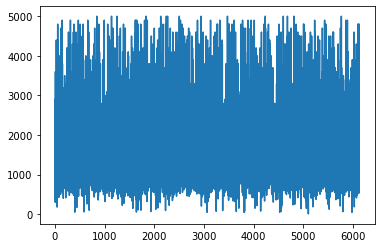

In [32]:
plt.plot(range(len(y)),y)
y_a= y.sort_values()

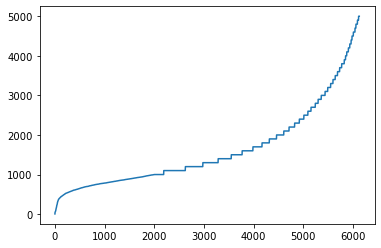

In [33]:
plt.plot(range(len(y)),y_a)

In [164]:
# # 读取数据并抽样
# data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.5, random_state=0)

# # 数据归一化
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = data.iloc[:, :-1]
# X_scaled = scaler.fit_transform(X)
# y = data.iloc[:, -1]

# # 卡方检验特征选择和PCA特征提取
# skb = SelectKBest(chi2, k=15)
# X_new = skb.fit_transform(X_scaled, y)
# pca = PCA(n_components=1)
# X_pca = pca.fit_transform(X_new)
# X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
mapemin=10
caim=0
caiim=0
for cai in range(90,110):
    for caii in range (50,95):
        mae_list = []
        rmse_list = []
        mape_list = []
        for train_index, test_index in kf.split(X_pca):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # 将y分为两类
            y_binary = np.where(y_train > 1400,1,0)
            lr_model = LogisticRegression()
            lr_model.fit(X_train, y_binary)
            y_pred = lr_model.predict(X_test)
            y_pred_new = np.where(y_pred > 0, 10*cai, 10*caii)
            mape_list.append(np.mean(np.abs((y_test - y_pred_new) / y_test)))
        if mapemin>np.mean(mape_list):
            mapemin=np.mean(mape_list)
            caim=cai
            caiim=caii
print(mapemin,caim,caiim)

0.5464640916490708 94 85


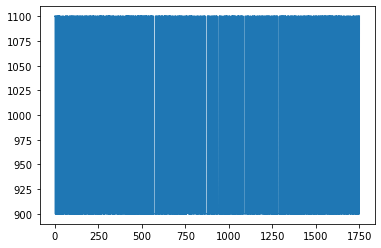

In [155]:
plt.plot(range(len(y_pred_new)),y_pred_new)

1035

In [158]:
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1400,1,0)
    lr_model = RandomForestRegressor()
    lr_model.fit(X_train, y_binary)
    
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    y_pred_new = np.where(y_pred > 0, 100*11, 100*9)
    
    #检测
    mae_list.append(mean_absolute_error(y_test, y_pred_new))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_new)))
    mape_list.append(np.mean(np.abs((y_test - y_pred_new) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2436.1594
RMSE: 9441.6912
MAPE: 53.4588%


In [255]:
# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1400,1,0)
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    y_pred_new = np.where(y_pred > 0, 1100, 946)
    
    #检测
    mae_list.append(mean_absolute_error(y_test, y_pred_new))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_new)))
    mape_list.append(np.mean(np.abs((y_test - y_pred_new) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2540.0571
RMSE: 11031.4481
MAPE: 55.6330%


In [154]:
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1400,1,0)
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    y_pred_new = np.where(y_pred > 0, 100*11, 100*9)
    
    #检测
    mae_list.append(mean_absolute_error(y_test, y_pred_new))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_new)))
    mape_list.append(np.mean(np.abs((y_test - y_pred_new) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2484.0390
RMSE: 9464.4812
MAPE: 52.3100%


## 四分类问题

In [225]:
# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 分类y值
    y_category = np.where(y_train < 500, 1, np.where(y_train < 1400, 2, np.where(y_train < 3000, 3, 4)))
    y_means=[362,945,1400,3000]
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_category)
    
    # 预测y值所属分类
    y_pred_category = lr_model.predict(X_test)
    
    # 将预测分类的值映射到每个分类的均值上
    y_pred = np.array([y_means[i-1] for i in y_pred_category])
    
    # 计算MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_list.append(mape)

# 显示结果
print('MAPE: %.4f%%' % np.mean(mape_list))


MAPE: 54.1363%


In [226]:
#与上述代码只有PCA保留几维的区别
# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 分类y值
    y_category = np.where(y_train < 500, 1, np.where(y_train < 1400, 2, np.where(y_train < 3000, 3, 4)))
    y_means=[362,945,1400,3000]
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_category)
    
    # 预测y值所属分类
    y_pred_category = lr_model.predict(X_test)
    
    # 将预测分类的值映射到每个分类的均值上
    y_pred = np.array([y_means[i-1] for i in y_pred_category])
    
    # 计算MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_list.append(mape)

# 显示结果
print('MAPE: %.4f%%' % np.mean(mape_list))

MAPE: 54.8397%


In [227]:
# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 分类y值
    y_category = np.where(y_train < 500, 1, np.where(y_train < 1400, 2, np.where(y_train < 3000, 3, 4)))
    y_means=[362,945,1400,3000]
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_category)
    
    # 预测y值所属分类
    y_pred_category = lr_model.predict(X_test)
    
    # 将预测分类的值映射到每个分类的均值上
    y_pred = np.array([y_means[i-1] for i in y_pred_category])
    
    # 计算MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_list.append(mape)

# 显示结果
print('MAPE: %.4f%%' % np.mean(mape_list))

MAPE: 55.9328%


In [224]:
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 分类y值
    y_category = np.where(y_train <600, 1, np.where(y_train < 1400, 2, np.where(y_train < 3000, 3, 4)))
    y_means=[562,900,1400,2000]
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_category)
    
    # 预测y值所属分类
    y_pred_category = lr_model.predict(X_test)
    
    # 将预测分类的值映射到每个分类的均值上
    y_pred = np.array([y_means[i-1] for i in y_pred_category])
    print(y_pred_category.min())
    print(y_pred_category.max())
    # 计算MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_list.append(mape)

# 显示结果
print('MAPE: %.4f%%' % np.mean(mape_list))

2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
MAPE: 53.9118%


## 不用十折交叉

In [231]:
# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=0)

    # 分类y值
y_category = np.where(y_train <600, 1, np.where(y_train < 1400, 2, np.where(y_train < 3000, 3, 4)))
y_means=[562,900,1400,2000]
   
lr_model = LogisticRegression()
lr_model.fit(X_train, y_category)
    
    # 预测y值所属分类
y_pred_category = lr_model.predict(X_test)
    
    # 将预测分类的值映射到每个分类的均值上
y_pred = np.array([y_means[i-1] for i in y_pred_category])
print(y_pred_category.min())
print(y_pred_category.max())
   # 计算MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

2
4


In [254]:
y_category = np.where(y_train <600, 1, np.where(y_train < 1400, 2, np.where(y_train < 4000, 3, 4)))
y_means=[902,900,1100,2000]

lr_model = LogisticRegression()
lr_model.fit(X_train, y_category)
    
# 预测y值所属分类
y_pred_category = lr_model.predict(X_test)
    
# 将预测分类的值映射到每个分类的均值上
y_pred = np.array([y_means[i-1] for i in y_pred_category])
print(y_pred_category.min())
print(y_pred_category.max())

# 计算MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

2
3
58.81235951088003


In [250]:
y_pred.max()

4000